# Exploratory Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
    
    In between this notebook, and the first, I cleaned the data further in Excel since the dataset was small enough to begin with. First, I combined the various LGBT related biases into one as 'Anti-LGBT'. I also, cleaned up some other biases to make the entire column uniform as possible. Second, I cleaned the offender ethnicity column for the same reason. The resulting dataset lists 60 separate alleged hate crimes, in Austin, TX, since 2017. 
    
    Out of the total number of reported incidents, 30% were directed at the LGBT Community. 
    
> **Questions**:
><ul>
><li><a href="#q1"> 1. How are reported incidents in Austin distributed according to motivation?</a></li>
><li><a href="#q2"> 2. How are offense types distributed during the course of a hate crime?</a></li> 
><li><a href="#q3"> 3. What is the race/ethnicity of the offenders?</a></li>
><li><a href="#q4"> 4. At what kinds of locations in Austin do hate crimes take place?</a></li>
><li><a href="#q5"> 5. Correlations between victims and offenders</a></li>

In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Loading & examining the dataset
df = pd.read_csv('aus_clean.csv')

display(df.head())
print('----------------------------------')
display(df.tail())
print('----------------------------------')
display(df.info())
print('----------------------------------')
display(df.index)
print('----------------------------------')
display(df.describe())
print('----------------------------------')

,date,incident_number,bias,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,race/ethnicity_of_offender(s)
0,2017-01-01,2017-241137,anti-black,1,0,1,0,Aggravated Assault,Park/Playground,white
1,2017-02-01,2017-580344,anti-white,1,0,1,0,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,black
2,2017-03-21,2017-800291,anti-jewish,0,0,0,0,Destruction,Highway/Road/Alley/Street/Sidewalk,unknown
3,2017-04-12,2017-1021534,anti-jewish,0,0,0,0,Simple Assault,Air/Bus/Train Terminal,white
4,2017-05-15,2017-1351550,anti-lgbt,2,1,0,1,Simple Assault,Residence/Home,white


----------------------------------


,date,incident_number,bias,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,race/ethnicity_of_offender(s)
55,2020-05-20,2020-1410411,anti-hispanic,1,0,1,0,Assault with Injury,Streets/Highway/Road/Alley,white
56,2020-06-04,2020-1560947,anti-black,1,0,1,0,Criminal Mischief,Residence/Home,unknown
57,2020-06-09,2020-1610708,anti-black,1,0,1,0,Criminal Mischief,Streets/Highway/Road/Alley,unknown
58,2020-06-17,2020-1690572,anti-black,1,0,1,0,Criminal Mischief,Parking Lot,unknown
59,2020-06-23,2020-1750961,anti-black,1,0,1,0,Criminal Mischief,Streets/Highway/Road/Alley,unknown


----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
date                             60 non-null object
incident_number                  60 non-null object
bias                             60 non-null object
number_of_offenders_over_18      60 non-null int64
number_of_offenders_under_18     60 non-null int64
number_of_victims_over_18        60 non-null int64
number_of_victims_under_18       60 non-null int64
offense                          60 non-null object
offense_location                 60 non-null object
race/ethnicity_of_offender(s)    60 non-null object
dtypes: int64(4), object(6)
memory usage: 4.8+ KB


None

----------------------------------


RangeIndex(start=0, stop=60, step=1)

----------------------------------


,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18
count,60.000000,60.000000,60.000000,60.000000
mean,1.016667,0.116667,0.916667,0.050000
std,0.791730,0.490301,0.381419,0.219784
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000
max,4.000000,3.000000,2.000000,1.000000


----------------------------------


In [3]:
# Creating an index out of the 'date' column annd converting the non-numeric columns into categories
df['date'] = df['date'].astype('datetime64')
df.set_index(['date'], inplace=True)
df.sort_index(inplace=True)
df['bias'] = df['bias'].astype('category')
df['offense'] = df['offense'].astype('category')
df['offense_location'] = df['offense_location'].astype('category')
df['race/ethnicity_of_offender(s)'] = df['race/ethnicity_of_offender(s)'].astype('category')

# Reexamining the dataset
display(df.index)
print('----------------------------------')
display(df.dtypes)

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-21', '2017-04-12',
               '2017-05-15', '2017-06-04', '2017-06-15', '2017-06-17',
               '2017-07-01', '2017-07-05', '2017-07-20', '2017-07-21',
               '2017-10-15', '2017-10-24', '2017-11-10', '2017-11-16',
               '2017-11-26', '2018-01-19', '2018-01-25', '2018-02-08',
               '2018-02-22', '2018-03-02', '2018-03-06', '2018-03-08',
               '2018-04-01', '2018-04-30', '2018-05-21', '2018-06-16',
               '2018-06-28', '2018-08-13', '2018-08-25', '2018-09-09',
               '2018-09-11', '2018-10-11', '2018-10-19', '2018-12-15',
               '2018-12-29', '2019-01-19', '2019-02-22', '2019-03-31',
               '2019-04-04', '2019-06-11', '2019-08-06', '2019-08-12',
               '2019-08-24', '2019-11-23', '2019-12-19', '2019-12-30',
               '2020-03-01', '2020-03-08', '2020-03-22', '2020-03-22',
               '2020-04-20', '2020-04-29', '2020-05-17', '2020-05-20',
      

----------------------------------


incident_number                    object
bias                             category
number_of_offenders_over_18         int64
number_of_offenders_under_18        int64
number_of_victims_over_18           int64
number_of_victims_under_18          int64
offense                          category
offense_location                 category
race/ethnicity_of_offender(s)    category
dtype: object

In [4]:
# Reexamining the head, tail, & stats
display(df.head())
print('----------------------------------')
display(df.tail())
print('----------------------------------')
display(df.info())

,incident_number,bias,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,race/ethnicity_of_offender(s)
date,,,,,,,,,
2017-01-01,2017-241137,anti-black,1,0,1,0,Aggravated Assault,Park/Playground,white
2017-02-01,2017-580344,anti-white,1,0,1,0,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,black
2017-03-21,2017-800291,anti-jewish,0,0,0,0,Destruction,Highway/Road/Alley/Street/Sidewalk,unknown
2017-04-12,2017-1021534,anti-jewish,0,0,0,0,Simple Assault,Air/Bus/Train Terminal,white
2017-05-15,2017-1351550,anti-lgbt,2,1,0,1,Simple Assault,Residence/Home,white


----------------------------------


,incident_number,bias,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,race/ethnicity_of_offender(s)
date,,,,,,,,,
2020-05-20,2020-1410411,anti-hispanic,1,0,1,0,Assault with Injury,Streets/Highway/Road/Alley,white
2020-06-04,2020-1560947,anti-black,1,0,1,0,Criminal Mischief,Residence/Home,unknown
2020-06-09,2020-1610708,anti-black,1,0,1,0,Criminal Mischief,Streets/Highway/Road/Alley,unknown
2020-06-17,2020-1690572,anti-black,1,0,1,0,Criminal Mischief,Parking Lot,unknown
2020-06-23,2020-1750961,anti-black,1,0,1,0,Criminal Mischief,Streets/Highway/Road/Alley,unknown


----------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2017-01-01 to 2020-06-23
Data columns (total 9 columns):
incident_number                  60 non-null object
bias                             60 non-null category
number_of_offenders_over_18      60 non-null int64
number_of_offenders_under_18     60 non-null int64
number_of_victims_over_18        60 non-null int64
number_of_victims_under_18       60 non-null int64
offense                          60 non-null category
offense_location                 60 non-null category
race/ethnicity_of_offender(s)    60 non-null category
dtypes: category(4), int64(4), object(1)
memory usage: 5.3+ KB


None

<a id='q1'></a>
### Question 1. How are reported incidences in Austin distributed according to motivation? 

In [5]:
# Create and display a dataframe of the biases
bias = df.bias.value_counts()
display(bias)

# Create and display a dataframe of the biases as percentages
bias_pct = df.bias.value_counts(normalize=True)
print('----------------------------------')
display(df.bias.value_counts(normalize=True))

anti-black         22
anti-lgbt          18
anti-hispanic       7
anti-muslim         4
anti-jewish         4
anti-white          3
anti-disability     1
anti-buddhist       1
Name: bias, dtype: int64

----------------------------------


anti-black         0.366667
anti-lgbt          0.300000
anti-hispanic      0.116667
anti-muslim        0.066667
anti-jewish        0.066667
anti-white         0.050000
anti-disability    0.016667
anti-buddhist      0.016667
Name: bias, dtype: float64

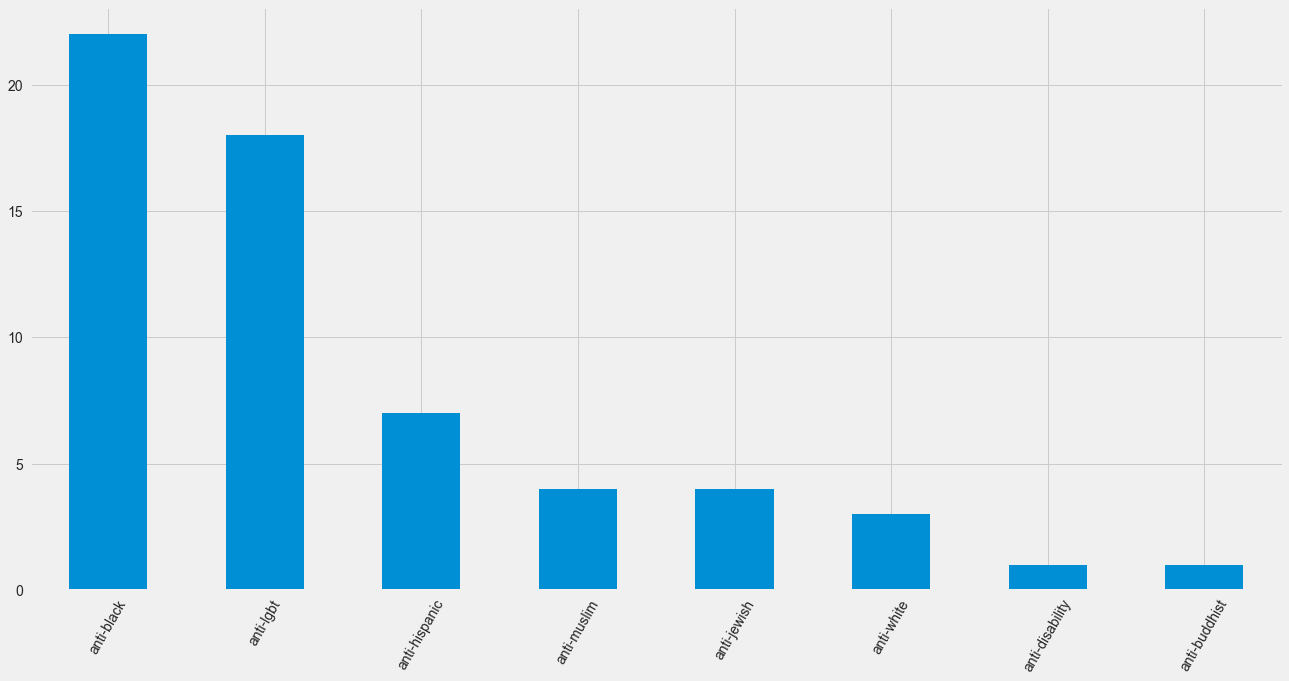

In [16]:
bias.plot.bar(figsize=(20,10), fontsize=14, rot=60)

As we can see, 30% of hate crimes, since 2017, occurred against the LGBT community. 

<a id='q2'></a>
### Question 2. How are offense types distributed during the course of a hate crime? 

In [6]:
# Create a dataframe for the offense values
offense_count = df.offense.value_counts()
display(offense_count)

# Displaying the offense values as proportions
print('----------------------------------')
offense_count_pct = df.offense.value_counts(normalize=True)
display(offense_count_pct)

Assault                21
Criminal Mischief       9
Simple Assault          8
Intimidation            7
Vandalism               4
Aggravated Assault      3
Destruction             2
Theft                   1
Robbery                 1
Burglary/Assault        1
Assault with Injury     1
Assault by Threat       1
Assault by Contact      1
Name: offense, dtype: int64

----------------------------------


Assault                0.350000
Criminal Mischief      0.150000
Simple Assault         0.133333
Intimidation           0.116667
Vandalism              0.066667
Aggravated Assault     0.050000
Destruction            0.033333
Theft                  0.016667
Robbery                0.016667
Burglary/Assault       0.016667
Assault with Injury    0.016667
Assault by Threat      0.016667
Assault by Contact     0.016667
Name: offense, dtype: float64

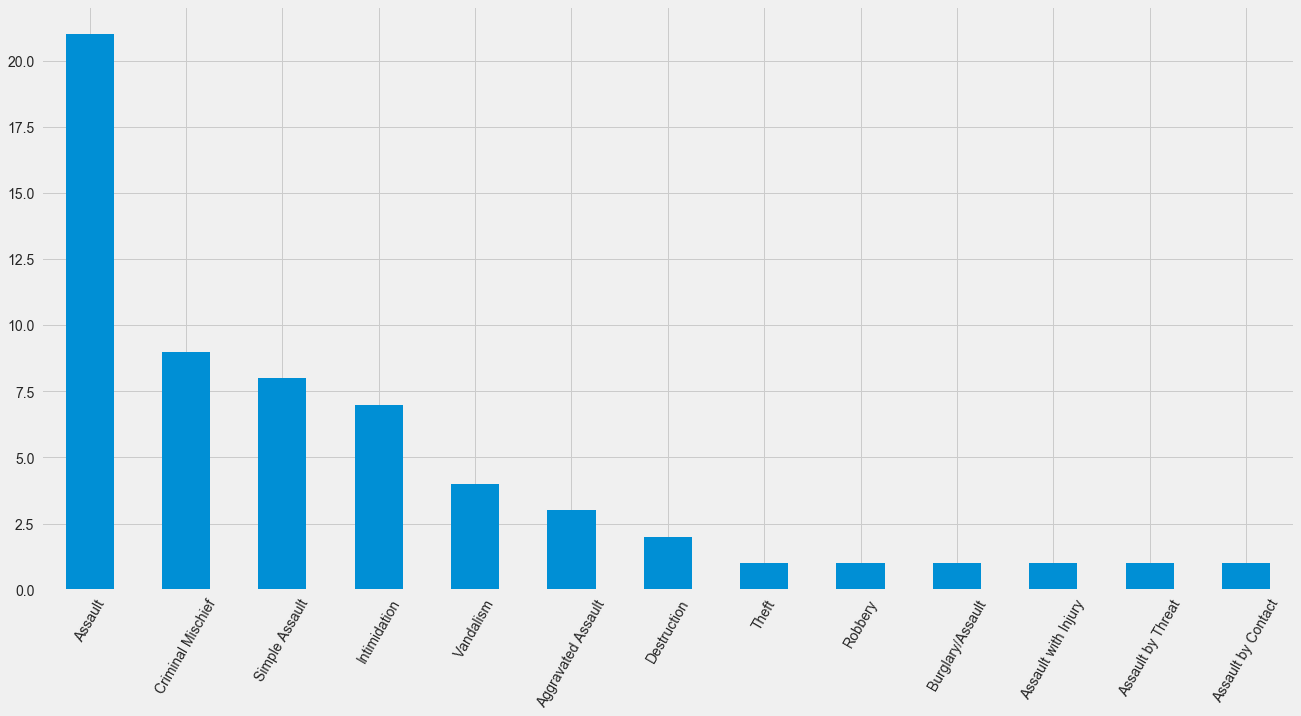

In [18]:
offense_count.plot.bar(figsize=(20,10), fontsize=14, rot=60)

There are so many types of assault. I am unsure, legally speaking, what the difference is between all the assault variables. Definitely a question for further research. 

<a id='q3'></a>
### Question 3. What is the race/ethnicity of the offenders?      

In [7]:
# Create a dataframe for the offender ethnicity values
offenders_count = df['race/ethnicity_of_offender(s)'].value_counts()
display(offenders_count)
print('----------------------------------')

# Displaying the offender ethnicity values as proportions
offenders_count_pct = df['race/ethnicity_of_offender(s)'].value_counts(normalize=True)
display(offenders_count_pct)

white                     25
unknown                   15
hispanic                  12
black                      5
white                      1
hispanic (2) white (2)     1
asian                      1
Name: race/ethnicity_of_offender(s), dtype: int64

----------------------------------


white                     0.416667
unknown                   0.250000
hispanic                  0.200000
black                     0.083333
white                     0.016667
hispanic (2) white (2)    0.016667
asian                     0.016667
Name: race/ethnicity_of_offender(s), dtype: float64

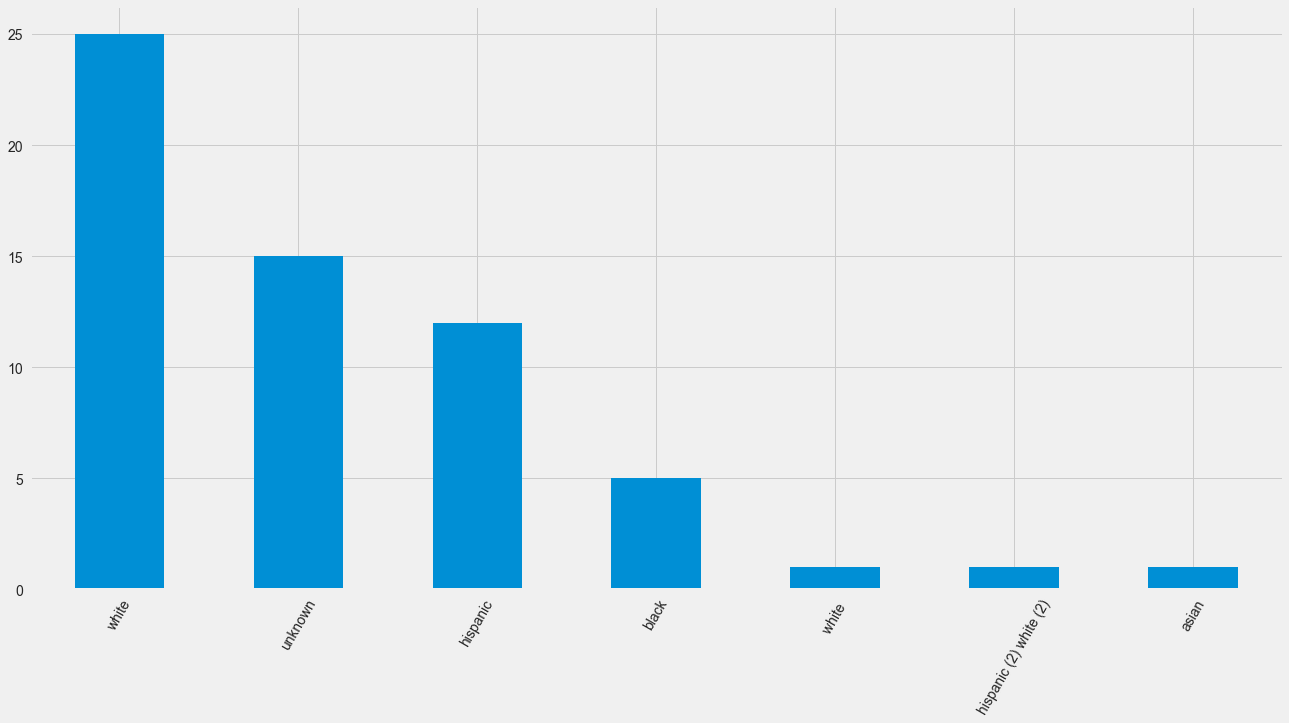

In [19]:
offenders_count.plot.bar(figsize=(20,10), fontsize=14, rot=60)

Note...the above result has an instance of 'Hispanic (2), Caucasian (2)' as a single offender because of an incident that occurred on 1/19/2019: https://www.statesman.com/news/20200124/confrontation-that-ignited-attack-on-austin-gay-couple-questioned-by-detective. Two of the offenders were white, and the other 2 were hispanic. 

So in actuality, of the total offenders, 44.44% were White, 22.22% were Hispanic, 7.94% were Black, and 1.59% (1 offender in total) were identified as Asian. 

It is interesting to note that, out of the total, 23.81% remains unidentified in terms of race and ethnicity. 

<a id='q4'></a>
### Question 4. At what kinds of locations in Austin do hate crimes take place? 

In [8]:
# Displaying 'offense location'
location = df.offense_location.value_counts()
display(location)
print('----------------------------------')

# Displaying 'offense location' as proportions
location_pct = df.offense_location.value_counts(normalize=True)
display(location_pct)

Residence/Home                        12
Streets/Highway/Road/Alley             8
Highway/Road/Alley/Street/Sidewalk     6
Bar/Nightclub                          5
Parking Lot/Garage                     5
Convenience Store                      4
Highway/Road/Street                    4
Parking Lot                            2
Park/Playground                        2
Department/Discount Store              1
Bank/Savings and Loan                  1
Church/Synagogue                       1
Church/Synagogue/Temple/Mosque         1
Hotel/Motel                            1
Drug Store/Dr.'s office/Hospital       1
Shelter-Mission/Homeless               1
Other/unknown                          1
Parking/Drop Lot                       1
Restaurant                             1
School-Elementary/Secondary            1
Air/Bus/Train Terminal                 1
Name: offense_location, dtype: int64

----------------------------------


Residence/Home                        0.200000
Streets/Highway/Road/Alley            0.133333
Highway/Road/Alley/Street/Sidewalk    0.100000
Bar/Nightclub                         0.083333
Parking Lot/Garage                    0.083333
Convenience Store                     0.066667
Highway/Road/Street                   0.066667
Parking Lot                           0.033333
Park/Playground                       0.033333
Department/Discount Store             0.016667
Bank/Savings and Loan                 0.016667
Church/Synagogue                      0.016667
Church/Synagogue/Temple/Mosque        0.016667
Hotel/Motel                           0.016667
Drug Store/Dr.'s office/Hospital      0.016667
Shelter-Mission/Homeless              0.016667
Other/unknown                         0.016667
Parking/Drop Lot                      0.016667
Restaurant                            0.016667
School-Elementary/Secondary           0.016667
Air/Bus/Train Terminal                0.016667
Name: offense

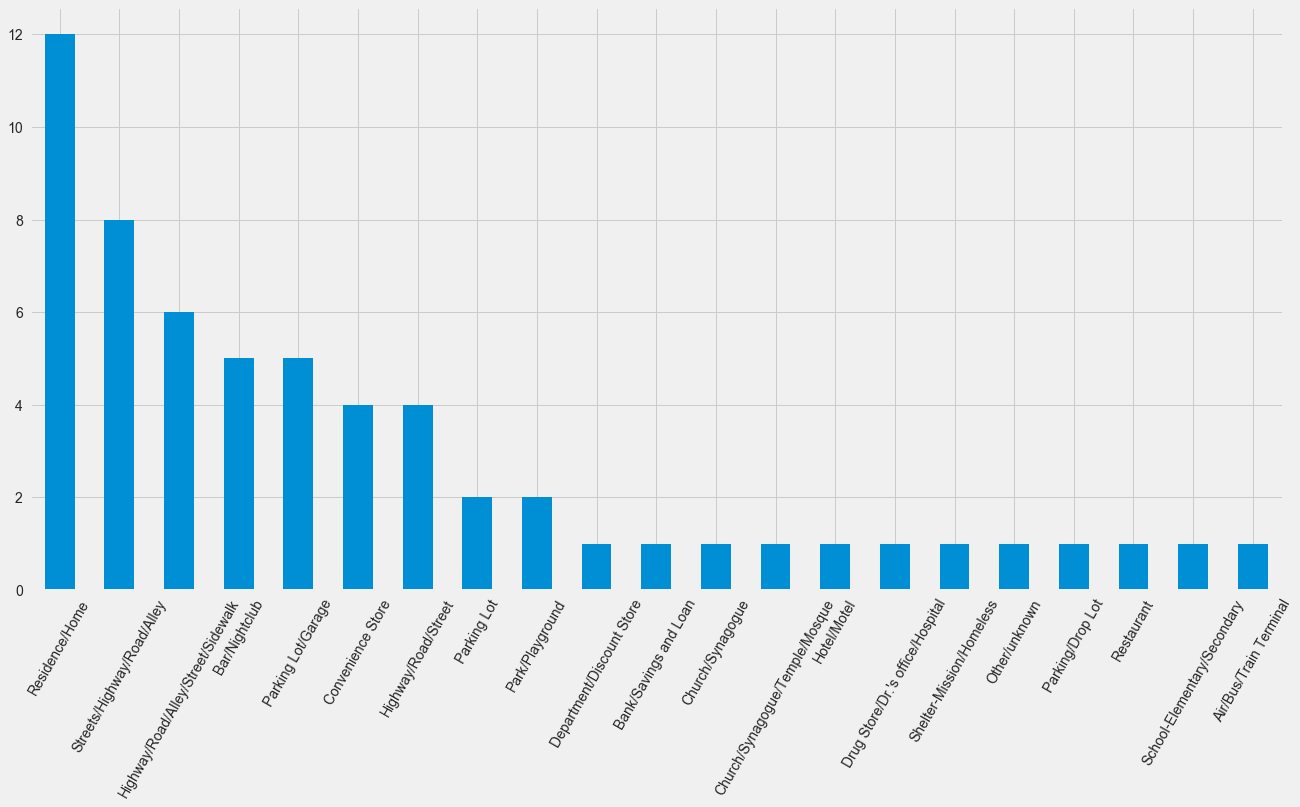

In [20]:
location.plot.bar(figsize=(20,10), fontsize=14, rot=60)

It's interesting that 20% of the instances occurred within a residence/home. 

As a final look, let's examine the correlations between victims and offenders. 

<a id='q5'></a>
### Correlations between offenders and victims

In [9]:
# Examining correlations between victims & offenders
df_corr = df.corr()
display(df_corr)

,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18
number_of_offenders_over_18,1.000000,-0.179744,0.341437,-0.004870
number_of_offenders_under_18,-0.179744,1.000000,-0.400293,0.574092
number_of_victims_over_18,0.341437,-0.400293,1.000000,-0.556010
number_of_victims_under_18,-0.004870,0.574092,-0.556010,1.000000


There's not much correlation between any of the variables, save that the instances where the victim(s) is/are under 18, the offender(s) is/are more than likely to be under 18 as well. Also, there's a very strong inverse correlation between offenders under 18 and victims over 18.  